In [2]:
import matplotlib.pyplot as plt 
from PIL import Image as im

In [3]:
from keras_segmentation.pretrained import pspnet_50_ADE_20K , pspnet_101_cityscapes, pspnet_101_voc12

model_ade20k = pspnet_50_ADE_20K() # load the pretrained model trained on ADE20k dataset

model_city_scape = pspnet_101_cityscapes() # load the pretrained model trained on Cityscapes dataset

model_pascal_voc = pspnet_101_voc12() # load the pretrained model trained on Pascal VOC 2012 dataset

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-10-25 13:34:24.470853: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-25 13:34:24.471489: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
models = [model_ade20k, model_city_scape, model_pascal_voc] 

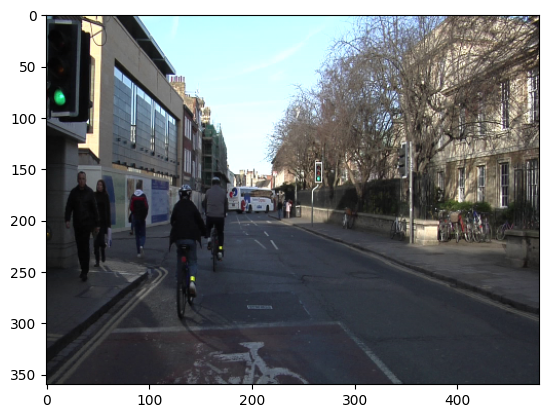

In [14]:
import os

dir_path = 'datasets/dataset1/images_prepped_test/'
img_path = dir_path + os.listdir(dir_path)[10]

plt.imshow(im.open(img_path))
plt.show()

1/1 [==============================] - 1s 563ms/step


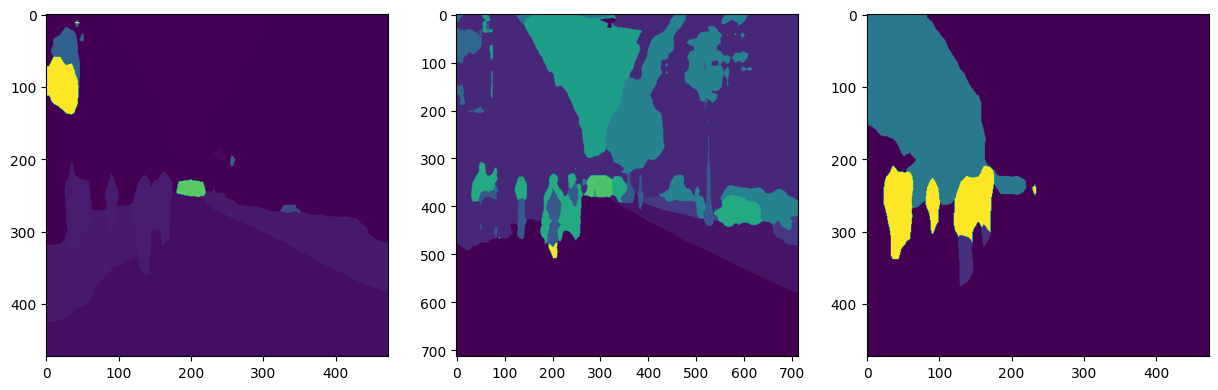

In [15]:
outs = []
for model in models:
    out = model.predict_segmentation(
        inp= img_path, 
        # out_fname= "out.png",
        )
    outs.append(out)


fig, ax = plt.subplots(1,3, figsize = (15,15))
for i in range(3):
    ax[i].imshow(outs[i])
plt.show()